# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [ ]:
# Your code here:
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes(return_X_y=False)

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [ ]:
# Your code here:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [ ]:
# Your code here:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [ ]:
# Enter your answer here:
'''10 atributos. 
Target is a quantitative measure of disease progression one year after baseline.
442 records.'''

'10 atributos. \nTarget is a quantitative measure of disease progression one year after baseline.\n442 records.'

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [ ]:
# Your code here:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [ ]:
# Your code here:
from sklearn import linear_model

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [ ]:
# Your code here:
diabetes_model = linear_model.LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [ ]:
# Your code here:
diabetes_data_train, diabetes_data_test = diabetes.data[:-20], diabetes.data[-20:]
diabetes_target_train, diabetes_target_test = diabetes.target[:-20], diabetes.target[-20:]
diabetes_data_test.shape

(20, 10)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [ ]:
# Your code here:
train = diabetes_model.fit(diabetes_data_train, diabetes_target_train)
print('Coefficiens:', train.coef_)
print('Intercept:', train.intercept_)

Coefficiens: [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Intercept: 152.76430691633442


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [ ]:
# Your code here:
diabetes_target_pred = diabetes_model.predict(diabetes_data_test)
print(diabetes_target_pred.shape)
diabetes_target_pred

(20,)


array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [ ]:
# Your code here:
print(diabetes_target_pred.shape)
diabetes_target_test

(20,)


array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [ ]:
# The coefficient of determination: 1 is perfect prediction
from sklearn.metrics import mean_squared_error, r2_score
print('MSE: %.2f' 
      % mean_squared_error(diabetes_target_test, diabetes_target_pred))
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_target_test, diabetes_target_pred))

MSE: 2004.57
Coefficient of determination: 0.59


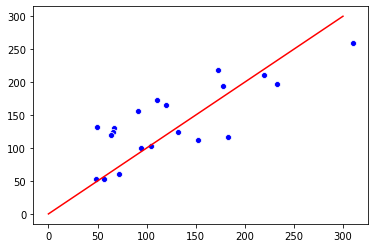

In [ ]:
import seaborn as sns
# Plot outputs
import matplotlib.pyplot as plt

line = np.arange(0, 300+1)
sns.scatterplot(diabetes_target_test, diabetes_target_pred, color = "b")
sns.lineplot(line, line, color = "r")
